In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('datensatz.csv')

In [3]:
#Erstelle Liste mit allen Programmiersprachen aus dem Datensatz
language_list = []
for row in df.LanguageWorkedWith:
    tmp = row.split(';')
    for language in tmp:
        if language not in language_list:
            language_list.append(language)

In [4]:
#Erstelle Liste mit allen Devtypes aus dem Datensatz
devtype_list = []
for row in df.DevType:
    tmp = row.split(";")
    for devtype in tmp:
        if devtype not in devtype_list:
            devtype_list.append(devtype)

In [5]:
#Erstellt einen neuen Dataframe mit der gleichen Anzahl an Reihen wie die Umfrage
#Fügt für jede Programmiersprache eine Spalte ein
#Setzt den Wert aller Felder auf 0
languages_df = pd.DataFrame(0 ,index=range(len(df)), columns=language_list)
#Loopt durch die Umfrage und fügt entpsrechend der Angaben in LanguageWorkedWith 1sen in languages_df ein
for i, row in df.iterrows():
    languages = row.LanguageWorkedWith.split(';')
    for language in languages:
        languages_df.set_value(i, language, 1)

c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [6]:
#Das gleiche wie eins obendrüber
devtype_df = pd.DataFrame(0, index=range(len(df)), columns=devtype_list)
for i, row in df.iterrows():
    devtypes = row.DevType.split(';')
    for devtype in devtypes:
        devtype_df.set_value(i, devtype, 1)

c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


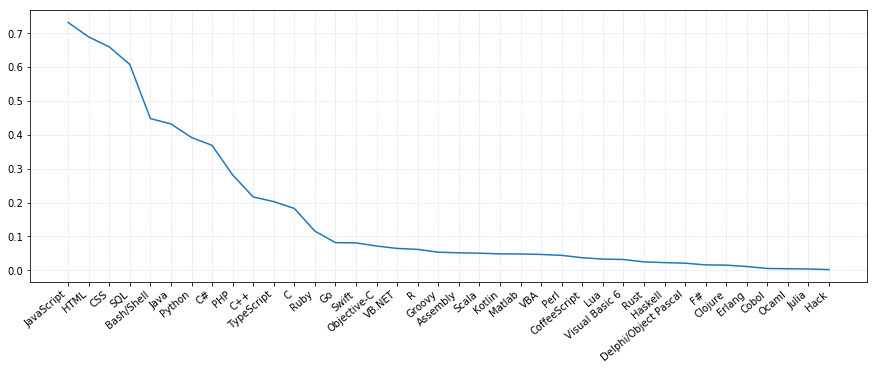

In [7]:
languages_df.mean().sort_values(ascending=False).plot(xticks=range(len(language_list)), rot=40,
                                                     figsize=(15,5))
plt.xticks(horizontalalignment='right');
plt.grid(linestyle=":", linewidth=0.5);

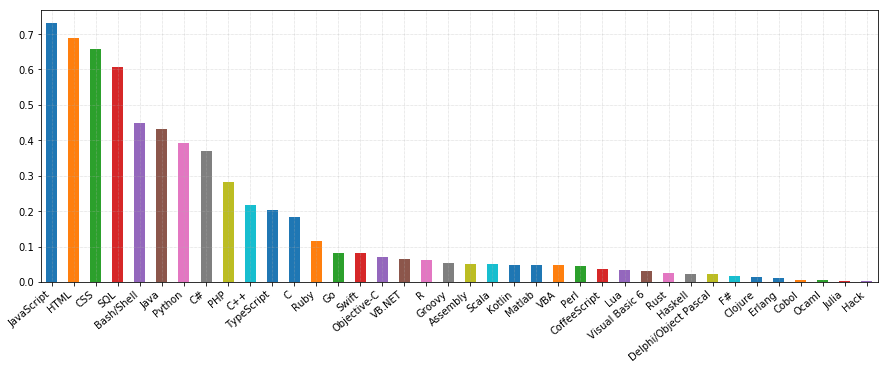

In [8]:
languages_df.mean().sort_values(ascending=False).plot(xticks=range(len(language_list)), rot=40,
                                                     figsize=(15,5), kind='bar')
plt.xticks(horizontalalignment='right');
plt.grid(linestyle=":", linewidth=0.5);

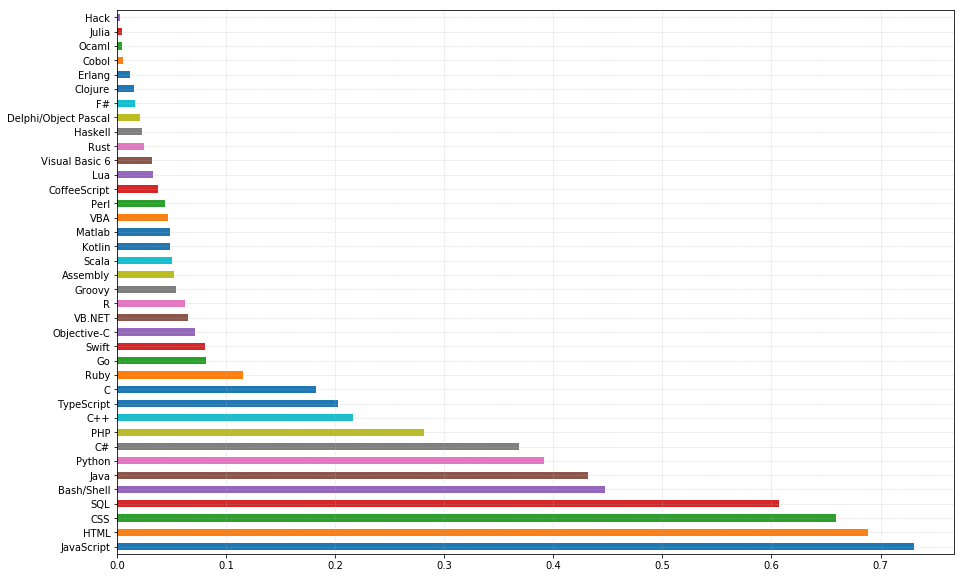

In [9]:
#Wenn y-Achse zu kurz ist, ist bei Hack kein Balken sichtbar
languages_df.mean().sort_values(ascending=False).plot(figsize=(15,10), kind='barh');
plt.grid(linestyle=":", linewidth=0.5);

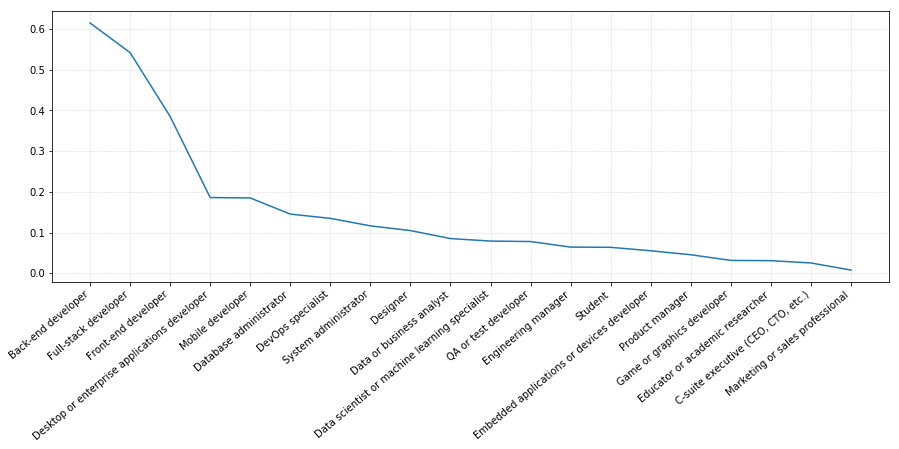

In [10]:
devtype_df.mean().sort_values(ascending=False).plot(xticks=range(len(devtype_list)), rot=40,
                                                   figsize=(15,5))
plt.xticks(horizontalalignment='right');
plt.grid(linestyle=":", linewidth=0.5);

In [11]:
devtype_df.mean().sort_values(ascending=False).plot(xticks=range(len(devtype_list)), rot=40,
                                                   figsize=(10,5), kind='bar')
plt.xticks(horizontalalignment='right');
plt.grid(linestyle=":", linewidth=0.5);

In [12]:

devtype_df.mean().sort_values(ascending=False).plot(figsize=(5,7), kind='barh');
plt.grid(linestyle=":", linewidth=0.5);

In [13]:
#Speichert die zwei erstellten DataFrames als CSV
languages_df.to_csv('LanguagesWorkedWith.csv', index=False)
devtype_df.to_csv('DevType.csv', index=False)